In [5]:
import yfinance as yf
import pandas as pd

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp_const = tables[0]
sp_const.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [10]:
historical = tables[1]
historical.loc[:, ("Date", "Date")] = pd.to_datetime(historical.loc[:, ("Date", "Date")])
historical

Date  Added                                Removed  \
                    Date Ticker                       Security  Ticker   
0    2024-05-08 00:00:00    VST                         Vistra     PXD   
1    2024-04-03 00:00:00    NaN                            NaN    XRAY   
2    2024-04-03 00:00:00    NaN                            NaN     VFC   
3    2024-04-02 00:00:00    GEV                     GE Vernova     NaN   
4    2024-04-01 00:00:00   SOLV                      Solventum     NaN   
..                   ...    ...                            ...     ...   
340  1999-06-09 00:00:00    WLP                      Wellpoint     HPH   
341  1998-12-11 00:00:00    FSR                        Firstar     LDW   
342  1998-12-11 00:00:00    CCL                 Carnival Corp.     GRN   
343  1998-12-11 00:00:00   CPWR                      Compuware     SUN   
344  1997-06-17 00:00:00    CCI  Countrywide Credit Industries     USL   

                                \
                      Security   
0    Pioneer Natural Resources   
1              Dentsply Sirona   
2               VF Corporation   
3                          NaN   
4                          NaN   
..                         ...   
340   Harnischfeger Industries   
341                      Amoco   
342                 General Re   
343                 SunAmerica   
344                     USLife   

                                                Reason  
                                                Reason  
0    S&P 500 and S&P 100 constituent ExxonMobil acq...  
1                     Market capitalization change.[5]  
2                     Market capitalization change.[5]  
3    S&P 500 and 100 constituent General Electric C...  
4    S&P 500 and 100 constituent 3M Co. spun off So...  
..                                                 ...  
340           Harnischfeger filed for bankruptcy.[255]  
341                           BP purchased Amoco.[256]  
342      Berkshire Hathaway purchased General Re.[256]  
343                     AIG purchased SunAmerica.[256]  
344                          AIG acquired USLife.[257]  

[345 rows x 6 columns]

In [16]:
removed_symbols_since_2019 = historical[historical.loc[:, ("Date", "Date")] > pd.to_datetime("2019-01-01")].loc[:, ("Removed", "Ticker")].unique().tolist()
added_symbols_since_2019 = historical[historical.loc[:, ("Date", "Date")] > pd.to_datetime("2019-01-01")].loc[:, ("Added", "Ticker")].unique().tolist()
removed_symbols_since_2019 = [ticker for ticker in removed_symbols_since_2019 if isinstance(ticker, str)]

In [27]:
sp_removed = yf.download(removed_symbols_since_2019, start = "2019-01-01")

/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _

In [40]:
sp_removed_close = sp_removed.loc[:, "Adj Close"]
sp_removed_close = sp_removed_close.loc[:, sp_removed_close.columns[sp_removed_close.isna().mean() < 1].tolist()]
sp_removed_close

Ticker,AAP,ABMD,AIV,ALK,AMG,BHF,BMS,COTY,CPRI,DXC,...,UAA,UNM,VFC,VNO,VNT,WHR,WU,XRAY,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,144.577087,309.959991,3.944513,59.860050,96.344223,31.719999,45.148987,6.579662,38.970001,52.396488,...,17.809999,24.002802,56.220112,45.821194,NaN,86.303513,12.964952,35.750107,15.585838,34.538258
2019-01-03,149.090576,302.290009,3.978975,56.551792,94.578773,31.299999,44.842587,6.428188,37.119999,52.608028,...,17.379999,23.867008,54.565422,45.699734,NaN,86.015617,12.760724,35.768978,15.245165,34.347195
2019-01-04,145.391891,313.440002,3.992946,58.381062,98.717758,32.810001,45.267590,6.778472,38.959999,55.117756,...,18.129999,25.033201,56.440723,46.466465,NaN,90.222031,12.927135,36.806858,15.833596,35.402126
2019-01-07,147.525070,314.799988,3.995741,58.497826,100.581268,32.630001,46.315269,7.147690,40.000000,55.156223,...,18.670000,25.105087,57.504471,47.354649,NaN,92.853043,12.889313,37.467323,16.174273,35.543335
2019-01-08,146.499664,318.420013,4.105647,59.013527,100.404724,32.740002,45.919918,7.119289,40.919998,56.887066,...,18.870001,25.248867,58.788818,48.599617,NaN,94.940239,12.912004,37.212578,16.708513,35.867294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,67.419998,NaN,7.950000,41.930000,162.160004,44.459999,NaN,10.200000,34.410000,15.730000,...,6.950000,53.820000,13.810000,24.209999,39.425034,92.239998,12.870000,28.040001,13.860000,42.029999
2024-06-04,65.209999,NaN,7.970000,41.759998,159.429993,43.419998,NaN,10.010000,33.840000,15.460000,...,7.020000,52.299999,13.120000,24.100000,38.995304,89.230003,12.960000,27.719999,13.850000,41.130001
2024-06-05,65.269997,NaN,8.040000,41.450001,158.429993,43.580002,NaN,10.110000,33.970001,15.450000,...,6.880000,51.820000,13.470000,24.070000,39.475002,89.519997,12.970000,27.639999,13.770000,40.950001


In [43]:
sp_current = yf.download(sp_const.Symbol.tolist(), start = "2019-01-01")
sp_current_close = sp_current.loc[:, "Adj Close"]
sp_current_close = sp_current_close.loc[:, sp_current_close.columns[sp_current_close.isna().mean() < 1].tolist()]
sp_current_close

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.278904,31.963156,37.793785,69.330475,NaN,63.287041,26.190001,130.096802,224.570007,77.463661,...,139.077774,17.168499,98.979004,41.404732,53.034840,62.223671,82.753326,95.440063,156.240005,81.243538
2019-01-03,60.947727,29.581665,34.029251,67.046127,NaN,60.300270,25.780001,125.655075,215.699997,72.784470,...,136.160187,17.750618,98.021454,41.241585,52.220566,60.090599,80.671806,93.713760,146.880005,78.435402
2019-01-04,63.057343,31.530161,35.481918,69.206154,NaN,62.021286,26.389999,130.541000,226.190002,74.551559,...,139.839706,18.356657,101.974930,41.645157,54.145912,62.625931,82.771408,96.914391,152.970001,81.512810
2019-01-07,64.396339,32.425678,35.402943,70.216232,NaN,62.950119,26.330000,130.994415,229.259995,75.020378,...,140.871124,18.723473,103.785744,41.464832,54.427483,61.699745,82.680901,96.951698,155.289993,82.003265
2019-01-08,65.340378,31.904114,36.077847,70.542580,NaN,62.194336,26.430000,134.307205,232.679993,76.850578,...,141.772400,18.835110,107.037628,41.945686,54.823223,62.279781,82.518021,94.777550,156.330002,83.224602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,131.399994,11.530000,194.029999,160.190002,146.250000,102.870003,101.699997,281.760010,439.019989,231.290009,...,255.039993,29.709999,94.910004,55.279999,114.449997,138.610001,139.330002,113.120003,307.630005,172.369995
2024-06-04,130.850006,11.500000,194.350006,162.139999,147.080002,103.430000,100.860001,288.059998,448.369995,230.630005,...,255.179993,29.469999,92.919998,56.029999,112.669998,137.100006,141.539993,113.440002,302.769989,171.880005
2024-06-05,133.559998,11.620000,195.869995,165.440002,145.779999,103.230003,99.680000,291.019989,455.799988,235.679993,...,253.610001,29.450001,93.360001,55.160000,113.120003,139.669998,140.529999,112.639999,307.500000,175.820007


<Axes: xlabel='Ticker', ylabel='Date'>

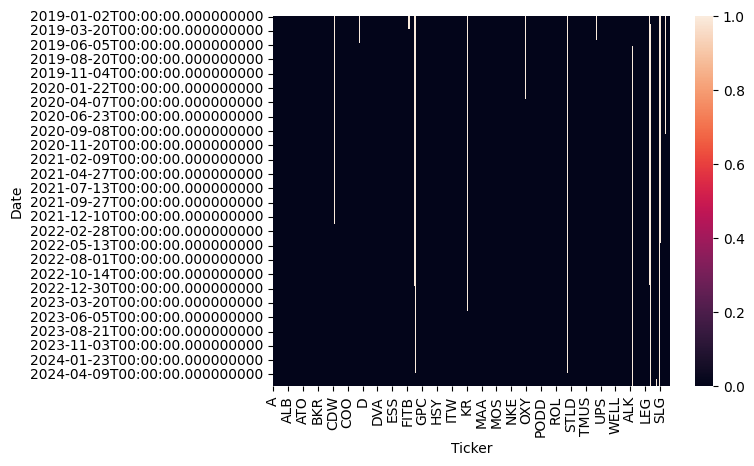

In [47]:
import seaborn as sns
sp_full = sp_current_close.merge(sp_removed_close, left_index=True, right_index=True)
sns.heatmap(sp_full.isna())

<Axes: xlabel='Date'>

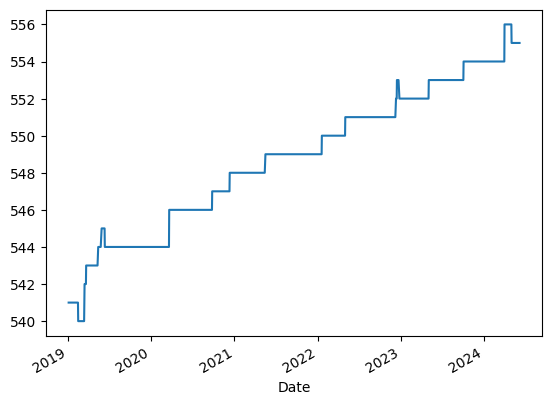

In [56]:
sp_returns = sp_full.pct_change(fill_method = None).iloc[1:, :]
sp_returns.notnull().sum(axis = 1).plot()

In [98]:
sp_full.to_csv("sp500_2019_2024.csv", index = True)

# From here

In [1]:
import pandas as pd

sp_full = pd.read_csv("sp500_2019_2024.csv")
sp_full.index = pd.to_datetime(sp_full.Date)
sp_full.drop(["Date"], axis = 1, inplace = True)
sp_returns = sp_full.pct_change(fill_method = None).iloc[1:, :]
sp_returns.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,UAA,UNM,VFC,VNO,VNT,WHR,WU,XRAY,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.036840,-0.074507,-0.099607,-0.032949,NaN,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,...,-0.024144,-0.005657,-0.029432,-0.002651,NaN,-0.003336,-0.015752,0.000528,-0.021858,-0.005532
2019-01-04,0.034614,0.065868,0.042689,0.032217,NaN,0.028541,0.023662,0.038884,0.048632,0.024278,...,0.043153,0.048862,0.034368,0.016778,NaN,0.048903,0.013041,0.029016,0.038598,0.030714
2019-01-07,0.021235,0.028402,-0.002226,0.014595,NaN,0.014976,-0.002274,0.003473,0.013573,0.006289,...,0.029785,0.002872,0.018847,0.019115,NaN,0.029162,-0.002926,0.017944,0.021516,0.003989
2019-01-08,0.014660,-0.016085,0.019063,0.004648,NaN,-0.012006,0.003798,0.025290,0.014918,0.024396,...,0.010712,0.005727,0.022335,0.026290,NaN,0.022478,0.001761,-0.006799,0.033030,0.009114
2019-01-09,0.020934,0.030845,0.016981,-0.032823,NaN,0.016691,0.012864,0.005030,0.011819,0.025340,...,0.018548,0.021828,0.002145,0.001406,NaN,0.023332,0.014645,0.005324,0.014365,0.008569


In [3]:
import yfinance as yf

# compare with equal weight SP500 ETF
sp_etf = yf.download("^SPXEW", start = "2019-01-01")
sp_etf_return = sp_etf.loc[:, "Adj Close"].pct_change().dropna()

/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


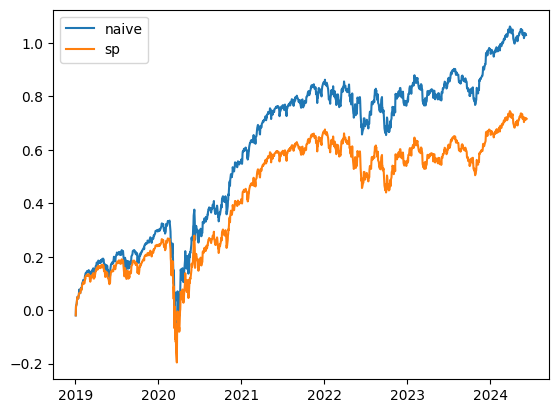

In [4]:
import matplotlib.pylab as plt

daily_naive_pf = sp_returns.mean(axis = 1)
plt.plot(daily_naive_pf.cumsum(), label = "naive")
plt.plot(sp_etf_return.cumsum(), label = "sp")
plt.legend()
plt.show()

In [47]:
sp_full.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,UAA,UNM,VFC,VNO,VNT,WHR,WU,XRAY,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.278904,31.963156,37.793785,69.330475,NaN,63.287041,26.190001,130.096802,224.570007,77.463661,...,17.809999,24.002802,56.220112,45.821194,NaN,86.303513,12.964952,35.750107,15.585838,34.538258
2019-01-03,60.947727,29.581665,34.029251,67.046127,NaN,60.300270,25.780001,125.655075,215.699997,72.784470,...,17.379999,23.867008,54.565422,45.699734,NaN,86.015617,12.760724,35.768978,15.245165,34.347195
2019-01-04,63.057343,31.530161,35.481918,69.206154,NaN,62.021286,26.389999,130.541000,226.190002,74.551559,...,18.129999,25.033201,56.440723,46.466465,NaN,90.222031,12.927135,36.806858,15.833596,35.402126
2019-01-07,64.396339,32.425678,35.402943,70.216232,NaN,62.950119,26.330000,130.994415,229.259995,75.020378,...,18.670000,25.105087,57.504471,47.354649,NaN,92.853043,12.889313,37.467323,16.174273,35.543335
2019-01-08,65.340378,31.904114,36.077847,70.542580,NaN,62.194336,26.430000,134.307205,232.679993,76.850578,...,18.870001,25.248867,58.788818,48.599617,NaN,94.940239,12.912004,37.212578,16.708513,35.867294


In [61]:
month_ends = pd.date_range(sp_full.index[0], ff.index[-1], freq = "ME")
m_est = 12
m_oos = 1
for t in range(m_est, len(month_ends) - m_oos):
    estimation_start = month_ends[t-m_est]
    estimation_end = month_ends[t]
    print(f"Estimation period: {month_ends[t-m_est]} - {month_ends[t]}")
    sp_full[]
    print(f"Oos period: {month_ends[t]} - {month_ends[t+1]}")

Estimation period: 2019-01-31 00:00:00 - 2020-01-31 00:00:00
Oos period: 2020-01-31 00:00:00 - 2020-02-29 00:00:00
Estimation period: 2019-02-28 00:00:00 - 2020-02-29 00:00:00
Oos period: 2020-02-29 00:00:00 - 2020-03-31 00:00:00
Estimation period: 2019-03-31 00:00:00 - 2020-03-31 00:00:00
Oos period: 2020-03-31 00:00:00 - 2020-04-30 00:00:00
Estimation period: 2019-04-30 00:00:00 - 2020-04-30 00:00:00
Oos period: 2020-04-30 00:00:00 - 2020-05-31 00:00:00
Estimation period: 2019-05-31 00:00:00 - 2020-05-31 00:00:00
Oos period: 2020-05-31 00:00:00 - 2020-06-30 00:00:00
Estimation period: 2019-06-30 00:00:00 - 2020-06-30 00:00:00
Oos period: 2020-06-30 00:00:00 - 2020-07-31 00:00:00
Estimation period: 2019-07-31 00:00:00 - 2020-07-31 00:00:00
Oos period: 2020-07-31 00:00:00 - 2020-08-31 00:00:00
Estimation period: 2019-08-31 00:00:00 - 2020-08-31 00:00:00
Oos period: 2020-08-31 00:00:00 - 2020-09-30 00:00:00
Estimation period: 2019-09-30 00:00:00 - 2020-09-30 00:00:00
Oos period: 2020-09

In [6]:
from fda_utils.misc import get_ff_factors
ff = get_ff_factors()
ff.rename({"RF": "risk_free"}, axis = 1, inplace = True)
ff.index = pd.to_datetime(ff.index)
ff

,Mkt-RF,SMB,HML,risk_free
date,,,,
1926-07-01,0.0010,-0.0025,-0.0027,0.00009
1926-07-02,0.0045,-0.0033,-0.0006,0.00009
1926-07-06,0.0017,0.0030,-0.0039,0.00009
1926-07-07,0.0009,-0.0058,0.0002,0.00009
1926-07-08,0.0021,-0.0038,0.0019,0.00009
...,...,...,...,...
2024-04-24,-0.0001,-0.0031,0.0027,0.00021
2024-04-25,-0.0047,-0.0031,-0.0018,0.00021
2024-04-26,0.0104,0.0046,-0.0106,0.00021


In [7]:
import statsmodels.api as sm
import numpy as np
from tqdm.auto import tqdm

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2021-12-31")

tmp_df = sp_returns.loc[start_date:end_date]
alphas, betas, tickers_used = [], [], []
for ticker in tqdm(sp_returns.columns):
    tseries = tmp_df.loc[:, ticker].dropna()
    if len(tseries) < 60:
        print(f"Ticker {ticker} excluded due to too little observations in the period between {start_date} and {end_date}.")
        continue
    else:
        tseries = tseries.to_frame(ticker)
        tickers_used.append(ticker)
    regression_df = tseries.merge(ff, left_index=True, right_index=True)
    X = regression_df.loc[:, ["Mkt-RF", "SMB", "HML"]]
    y = regression_df.loc[:, ticker] - regression_df.risk_free

    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    alphas.append(results.params.iloc[0])
    betas.append(results.params.iloc[1:].values)


  0%|          | 0/560 [00:00<?, ?it/s]

Ticker CEG excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker GEHC excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker GEV excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker KVUE excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker SOLV excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker VLTO excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker MBC excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker NFX excluded due to too little observations in the period between 2019-01-01 00:00:00 and 2021-12-31 00:00:00.
Ticker SIVB excluded due to too little observations 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

A = np.array(alphas)
B = np.array(betas)

scaler = StandardScaler()
B_cluster_data = scaler.fit_transform(B)
kmeans = KMeans(n_clusters=3)
kmeans.fit(B_cluster_data)

KMeans(n_clusters=3)

In [32]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers

array([[ 1.21691578,  0.30443705, -0.26881186],
       [ 0.82921057, -0.15541996,  0.15071081],
       [ 1.18660775,  0.47764858,  0.95096979]])

In [21]:
B_df = pd.DataFrame(B, columns = ["Mkt", "SMB", "HML"])
B_df.loc[:, "ticker"] = tickers_used
B_df.loc[:, "cluster_raw"] = kmeans.labels_
B_df.loc[:, "cluster_pf"] = -1

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

n_companies_per_cluster = 25
cluster_label, n_companies = np.unique(kmeans.labels_, return_counts=True)
final_companies_per_cluster = [min(n_comp, n_companies_per_cluster) for n_comp in n_companies] 

for i in range(3):
    cluster_idx = B_df[B_df.cluster_raw == i].index
    pairwise_similarities_tmp = cosine_similarity(B_cluster_data[B_df.cluster_raw == i], kmeans.cluster_centers_)
    cluster_top_idx = cluster_idx[np.flip(pairwise_similarities_tmp[:, i].argsort())].tolist()[:final_companies_per_cluster[i]]
    B_df.loc[cluster_top_idx, "cluster_pf"] = int(i)

In [28]:
import plotly.express as px

fig = px.scatter_3d(B_df, x='Mkt', y='SMB', z='HML', color = "cluster_pf", hover_name="ticker")
fig.update_layout(width = 800, height = 800)
fig.show()

In [46]:
pf_tickers = {}
for i in range(3):
    pf_tickers[i] = B_df[B_df.cluster_pf == i].ticker.tolist()

invest_start = end_date
invest_ends = pd.to_datetime("2022-01-31")

monthly_returns = sp_full.loc[invest_start:invest_ends, :].resample("ME").last().pct_change(fill_method=None).iloc[1, :]
monthly_returns[pf_tickers[2]]

APA    0.239818
CCL   -0.015408
CE    -0.073486
COP    0.227764
DOW    0.053068
DVN    0.148014
GM    -0.100631
HES    0.246657
HWM   -0.023248
LKQ   -0.085624
LYB    0.048791
MRO    0.185749
OXY    0.299414
RF     0.052294
SLB    0.304507
UAL   -0.020557
VTR    0.037168
ALK    0.050672
FLS    0.066013
FTI    0.096284
GPS    0.030517
HP     0.210970
LEG   -0.031827
NOV    0.211808
PVH   -0.109142
Name: 2022-01-31 00:00:00, dtype: float64